---
# `Cars Dataset - Exploratory Data Analysis`
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/Cars_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
display(df.shape)
display(df.dtypes)
display(df.describe())

(11914, 16)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


---
## Dropping irrelevant columns

In [4]:
cols_to_drop = ['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size']

df = df.drop(columns = cols_to_drop, axis=1)

In [5]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


---
## Renaming the columns for better readability

In [6]:
renamed_cols = ['make','model','year','horsepower','cylinders','transmission','wheel_drive','hgwy_mpg','city_mpg','price']
df.columns = renamed_cols
df.head()

,make,model,year,horsepower,cylinders,transmission,wheel_drive,hgwy_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


---
## Dropping Duplicate rows & NULL values

In [7]:
print("Number of Rows: ",len(df))
df = df.drop_duplicates()
print("After Dropping Duplicates: ",len(df))

Number of Rows:  11914
After Dropping Duplicates:  10925


In [8]:
print(df.isnull().sum())
df = df.dropna(subset=['horsepower','cylinders'])

make             0
model            0
year             0
horsepower      69
cylinders       30
transmission     0
wheel_drive      0
hgwy_mpg         0
city_mpg         0
price            0
dtype: int64


In [9]:
print("After Dropping NaNs: ",len(df))
print(df.isnull().sum())

After Dropping NaNs:  10827
make            0
model           0
year            0
horsepower      0
cylinders       0
transmission    0
wheel_drive     0
hgwy_mpg        0
city_mpg        0
price           0
dtype: int64


---
## Removing Outliers

In [10]:
# For the 'price' column
display(df.iloc[:,9:10])
Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
print(f'''Q1 = {Q1} \nQ2 = {Q2} \nQ3 = {Q3}''')

IQR = Q3 - Q1
print("\nIQR = ",IQR)

low = Q1 - (1.5 * IQR)
upp = Q3 + (1.5 * IQR)
print(f"Lower Bound = {low} \nUpper Bound = {upp}")

,price
0,46135
1,40650
2,36350
3,29450
4,34500
...,...
11909,46120
11910,56670
11911,50620
11912,50920


Q1 = 21972.5 
Q2 = 30845.0 
Q3 = 43300.0

IQR =  21327.5
Lower Bound = -10018.75 
Upper Bound = 75291.25


<Axes: xlabel='price'>

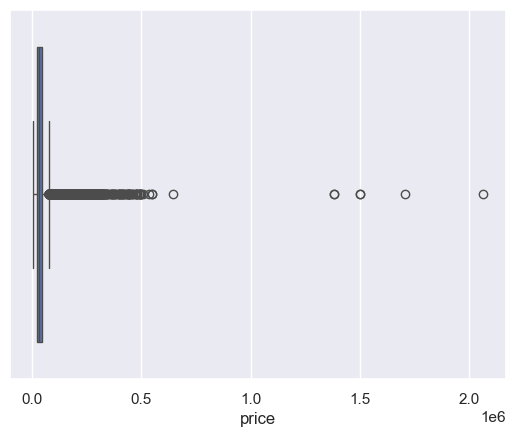

In [11]:
sns.boxplot(x=df["price"])
# fig = plt.figure(figsize =(10, 7))
# plt.boxplot(df['price'])
# plt.show()

In [12]:
outliers = []

for i in df['price']:
    if ((i>upp) or (i<low)):
        outliers.append(i)

print(f"The price column has {len(outliers)} outliers\n")
print(outliers[:36],"... and 900 more")

The price column has 936 outliers

[160829, 140615, 150694, 170829, 165986, 154090, 143860, 176287, 157767, 187124, 147332, 169900, 180408, 223970, 219775, 228625, 224585, 228625, 224585, 257412, 233509, 233509, 288000, 257412, 239340, 263553, 291744, 248500, 205840, 184900, 214670, 224670, 217890, 228339, 228339, 217890] ... and 900 more


### Boxplot of 'price' column after removing outliers

'Total rows after removing outliers:'

(9891, 10)

<Axes: xlabel='price'>

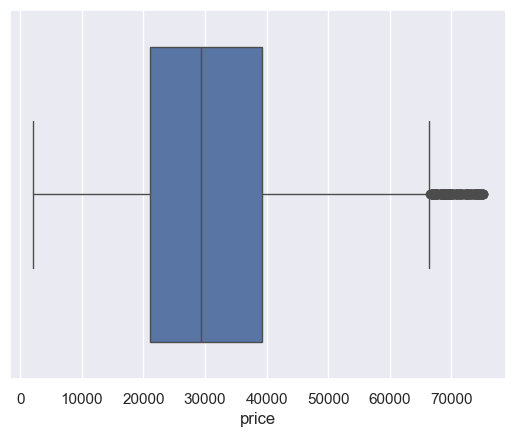

In [13]:
mask = ~df['price'].isin(outliers)
df_filtered = df[mask]
display('Total rows after removing outliers:',df_filtered.shape)
display(sns.boxplot(x=df_filtered["price"]))

---
## Count of Unique values in each Column

In [14]:
numeric_cols = df.select_dtypes(include=['int','float'])
display('Numeric columns',numeric_cols.head())
# display(df.loc[:,numeric_cols.columns])
text_cols = df.select_dtypes(include=['object'])
# display(df.loc[:,text_cols.columns])
display('Non-Numeric columns',text_cols.head())

'Numeric columns'

,year,horsepower,cylinders,hgwy_mpg,city_mpg,price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


'Non-Numeric columns'

,make,model,transmission,wheel_drive
0,BMW,1 Series M,MANUAL,rear wheel drive
1,BMW,1 Series,MANUAL,rear wheel drive
2,BMW,1 Series,MANUAL,rear wheel drive
3,BMW,1 Series,MANUAL,rear wheel drive
4,BMW,1 Series,MANUAL,rear wheel drive


In [15]:
for i in df.columns:
    print ("--------------- %s ----------------" % i)
    print(df[i].value_counts())
    print("\n")

--------------- make ----------------
make
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo 

---
# Visualisations

---
## Histogram of Horsepower Count

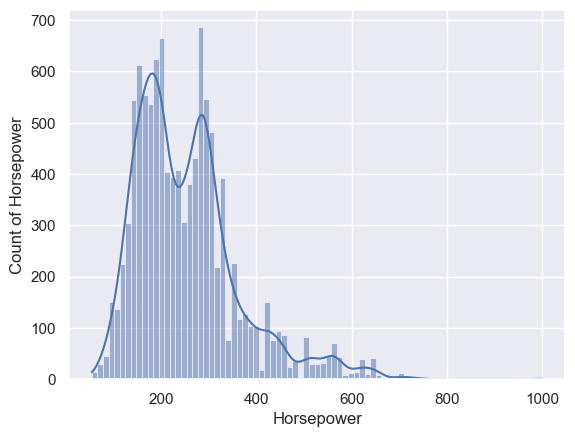

In [16]:
sns.histplot(df['horsepower'],kde=True)
plt.xlabel("Horsepower")
plt.ylabel("Count of Horsepower")
plt.show()

---
## Barplot of Cars by Manufacturer

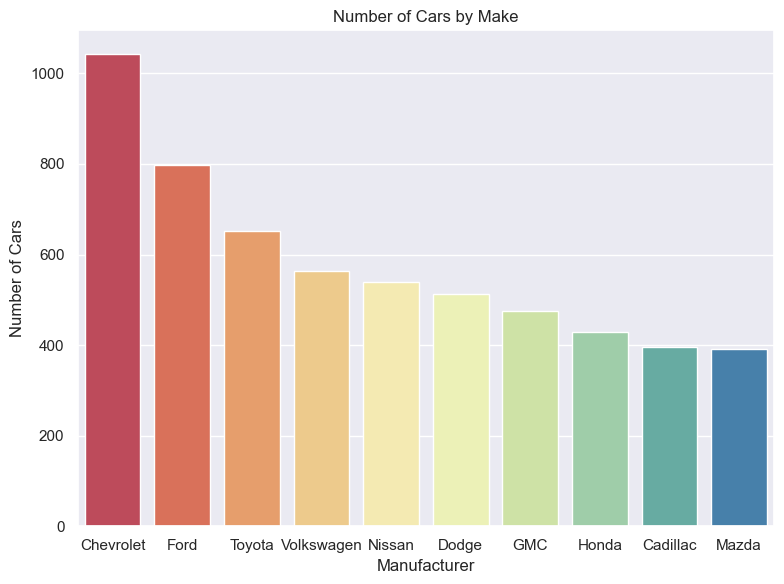

In [17]:
car_counts = df['make'].value_counts()
top_5_cars = car_counts.nlargest(10).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=top_5_cars, x='make', y='count', palette='Spectral')
# plt.bar(top_5_cars.index, top_5_cars.values, linewidth = 2) 

plt.title('Number of Cars by Make')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')

plt.tight_layout()
plt.show()

---
## Countplot of Transmission type with Drivemode as Hue

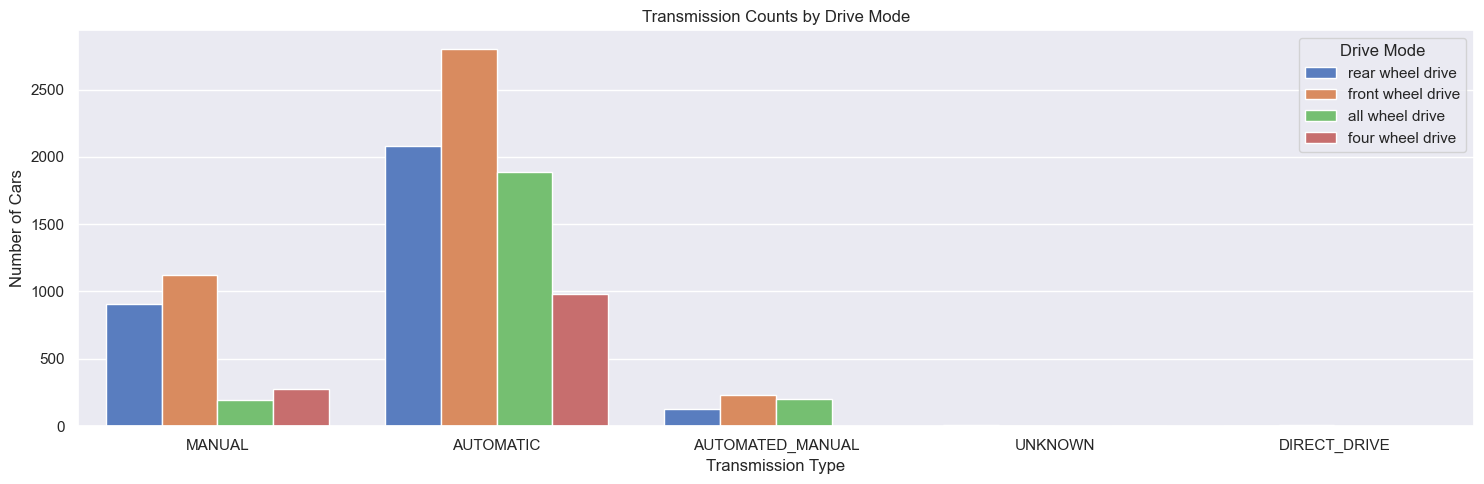

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(df, x="transmission", hue="wheel_drive", palette='muted')

plt.title('Transmission Counts by Drive Mode')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.legend(title='Drive Mode')

plt.tight_layout()
plt.show()

---
## Scatterplot of Horsepower by Retail Price

In [19]:
df[['horsepower', 'price']].head()

,horsepower,price
0,335.0,46135
1,300.0,40650
2,300.0,36350
3,230.0,29450
4,230.0,34500


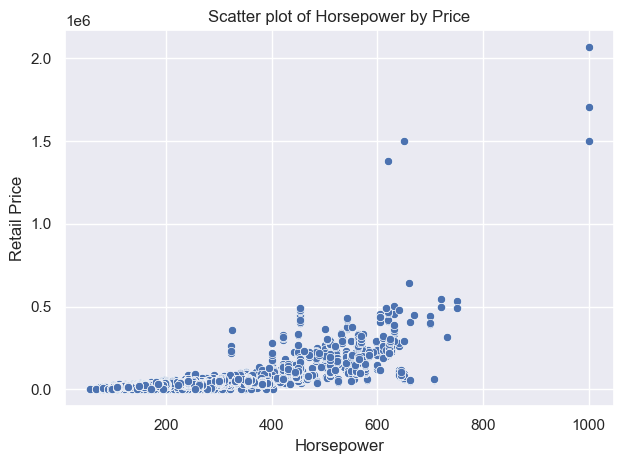

In [20]:
sns.scatterplot(data=df,x='horsepower', y='price')

plt.xlabel('Horsepower')
plt.ylabel('Retail Price')
plt.title('Scatter plot of Horsepower by Price')

plt.tight_layout()
plt.show()

---
## Bar plot of No. of Cylinders by Retail Price

In [21]:
df[['cylinders','price']].head()

,cylinders,price
0,6.0,46135
1,6.0,40650
2,6.0,36350
3,6.0,29450
4,6.0,34500


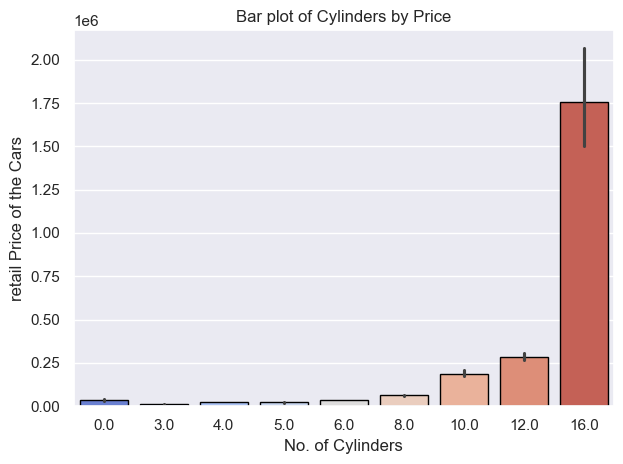

In [22]:
sns.barplot(data=df, x='cylinders', y='price', palette='coolwarm', edgecolor='black')

plt.title("Bar plot of Cylinders by Price")
plt.xlabel("No. of Cylinders")
plt.ylabel("retail Price of the Cars")

plt.tight_layout()
plt.show()

---
## Heatmap of the Cars Dataset

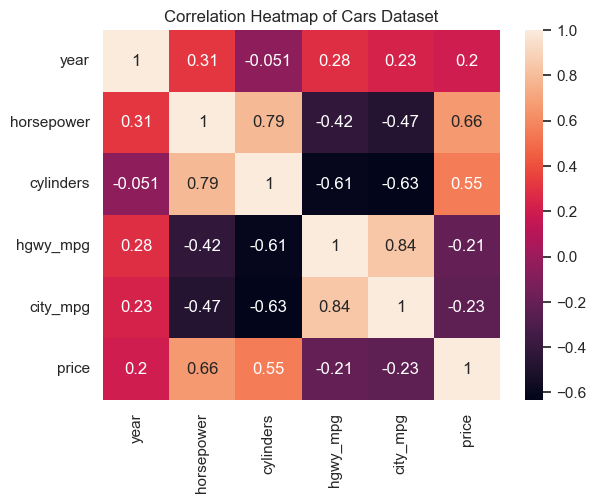

In [23]:
corr = numeric_cols.corr()
# print(corr)
sns.heatmap(corr, cmap='rocket', annot=True)
plt.title('Correlation Heatmap of Cars Dataset')

plt.show() 